In [1]:
# Loading required libraries

import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [6]:
# Identify the URL

URL = 'https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_4_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_4_0_na_na_na&as-pos=4&as-type=TRENDING&suggestionId=laptops&requestId=77c22454-660c-4e89-beba-11c6672e021e'

In [7]:
# Loading the WebPage in Memory using requests library

page = requests.get(URL)

In [8]:
# Check the Status Code of the Page

page.status_code

403

In [22]:
# Extracting the HTML Code of the WebPage

htmlCode = page.text
soup = BeautifulSoup(htmlCode)

In [23]:
htmlCode

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.82d9ea.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipka

In [24]:
# Price

price = soup.find('div', attrs={'class' : 'Nx9bqj _4b5DiR'})

print(price.text)

₹73,990


In [26]:
prices = soup.find_all('div', attrs = {'class' : 'Nx9bqj _4b5DiR'})

for i in prices:
    print(i.text)

₹73,990
₹31,990
₹35,990
₹30,979
₹40,990
₹40,990
₹11,990
₹24,990
₹36,990
₹38,990
₹35,590
₹44,991
₹65,990
₹35,991
₹46,990
₹72,490
₹27,989
₹49,491
₹40,990
₹20,990
₹31,950
₹46,691
₹50,990
₹36,990


In [99]:
# Scrapping the Web Page

title = []
rating = []
price = []
features = []

for i in range(1, 27):
    URL = 'https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=f61bf5d7-f7a7-4adb-88bc-0ad126f6e0af&as-searchtext=laptop&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'DOjaWF YJG4Cf'}):

        product = x.find('div', attrs={'class' : 'KzDlHZ'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : 'Nx9bqj _4b5DiR'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : 'XQDdHH'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)

        f = x.find('ul', attrs={'class' : 'G4BRas'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [100]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))
print(price)

24
24
24
24
['₹73,990', '₹35,990', '₹81,690', '₹42,990', '₹39,990', '₹42,990', '₹35,990', '₹39,990', '₹45,490', '₹59,490', '₹57,250', '₹1,07,490', '₹87,490', '₹49,990', '₹68,999', '₹48,990', '₹49,990', '₹1,02,990', '₹29,990', '₹31,990', '₹48,990', '₹60,390', '₹36,680', '₹31,990']


## Create a DataFrame and save it in CSV file

In [54]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})

In [55]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...


In [57]:
df.shape

(25, 4)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  25 non-null     object
 1   Rating   25 non-null     object
 2   MRP      25 non-null     object
 3   Feature  25 non-null     object
dtypes: object(4)
memory usage: 932.0+ bytes


In [59]:
df.to_csv('Laptop_Details.csv', index = False)

## Extracting the Details using Regex

In [60]:
import re

In [61]:
# print(df['Feature'][0])
# print(df['Feature'][2])
# print(df['Feature'][6])

In [62]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...


In [63]:
# Processor Information

regex = r'^[AMD|Intel][\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [64]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,[AMD Ryzen 3 Quad Core Processor]
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,[AMD Ryzen 3 Quad Core Processor]
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,[Intel Celeron Dual Core Processor]
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor]


In [65]:
# RAM Information

regex = r'[\d]+[\s]+GB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [66]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,[AMD Ryzen 3 Quad Core Processor],[8 GB DDR4 RAM]
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,[AMD Ryzen 3 Quad Core Processor],[8 GB LPDDR5 RAM]
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM]
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM]


In [67]:
#df['Feature'][0]
# df['Feature'][2]

In [68]:
import re

# Assuming 'df' is your DataFrame and 'Feature' is the column containing the information

# Define a regex pattern to match both operating system variations
regex = r'Windows 11 Operating System|64 bit Windows 11 Operating System'

# Function to extract OS information
def extract_os_info(text):
    matches = re.compile(regex).findall(text)
    if matches:
        return ', '.join(matches)
    else:
        return 'OS information not found'

# Apply the regex pattern to extract OS information
df['OS'] = df['Feature'].apply(extract_os_info)

In [69]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,[AMD Ryzen 3 Quad Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,[AMD Ryzen 3 Quad Core Processor],[8 GB LPDDR5 RAM],64 bit Windows 11 Operating System
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],Windows 11 Operating System
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],OS information not found


In [70]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [71]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,[AMD Ryzen 3 Quad Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD]
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,[AMD Ryzen 3 Quad Core Processor],[8 GB LPDDR5 RAM],64 bit Windows 11 Operating System,[512 GB SSD]
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD]
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD]
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],OS information not found,[]


In [72]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.compile(regex).findall(x))

In [73]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,[AMD Ryzen 3 Quad Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD],[Lenovo]
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,[AMD Ryzen 3 Quad Core Processor],[8 GB LPDDR5 RAM],64 bit Windows 11 Operating System,[512 GB SSD],[HP]
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD],[ZEBRONICS]
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD],[CHUWI]
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],OS information not found,[],[HP]


## Cleaning the Data

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    25 non-null     object
 1   Rating     25 non-null     object
 2   MRP        25 non-null     object
 3   Feature    25 non-null     object
 4   Processor  25 non-null     object
 5   RAM        25 non-null     object
 6   OS         25 non-null     object
 7   Storage    25 non-null     object
 8   Brand      25 non-null     object
dtypes: object(9)
memory usage: 1.9+ KB


In [75]:
# Missing Values

df.isnull().sum()

Product      0
Rating       0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

In [76]:
print(df['Processor'][4])

print(type(df['Processor'][3]))

['Intel Celeron Dual Core Processor']
<class 'list'>


In [77]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [78]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,"₹31,990",AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,"₹34,490",AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,AMD Ryzen 3 Quad Core Processor,8 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,HP
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,"₹33,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ZEBRONICS
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,"₹17,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,OS information not found,,HP


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    25 non-null     object
 1   Rating     25 non-null     object
 2   MRP        25 non-null     object
 3   Feature    25 non-null     object
 4   Processor  25 non-null     object
 5   RAM        25 non-null     object
 6   OS         25 non-null     object
 7   Storage    25 non-null     object
 8   Brand      25 non-null     object
dtypes: object(9)
memory usage: 1.9+ KB


In [80]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [81]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,31990.0,AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAMWi...,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,34490.0,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,AMD Ryzen 3 Quad Core Processor,8 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,HP
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,33990.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ZEBRONICS
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,Intel Celeron Dual Core Processor (11th Gen)8 ...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,17990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,OS information not found,,HP


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    25 non-null     object 
 1   Rating     25 non-null     object 
 2   MRP        25 non-null     float64
 3   Feature    25 non-null     object 
 4   Processor  25 non-null     object 
 5   RAM        25 non-null     object 
 6   OS         25 non-null     object 
 7   Storage    25 non-null     object 
 8   Brand      25 non-null     object 
dtypes: float64(1), object(8)
memory usage: 1.9+ KB


In [83]:
df = df.drop('Feature', axis=1)

In [84]:
df.head()

,Product,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,31990.0,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,34490.0,AMD Ryzen 3 Quad Core Processor,8 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,HP
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,33990.0,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ZEBRONICS
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,17990.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,OS information not found,,HP


In [85]:
df.isnull().sum()

Product      0
Rating       0
MRP          0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

## Data Visualisation

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [87]:
df.head()

,Product,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...,4.3,31990.0,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
1,HP 15s AMD Ryzen 3 Quad Core 7320U - (8 GB/512...,4.3,34490.0,AMD Ryzen 3 Quad Core Processor,8 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,HP
2,ZEBRONICS Pro Series Z Intel Core i5 12th Gen ...,3.8,33990.0,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ZEBRONICS
3,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
4,HP Chromebook Intel Celeron Dual Core N4020 - ...,3.8,17990.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,OS information not found,,HP


<Axes: xlabel='Brand', ylabel='MRP'>

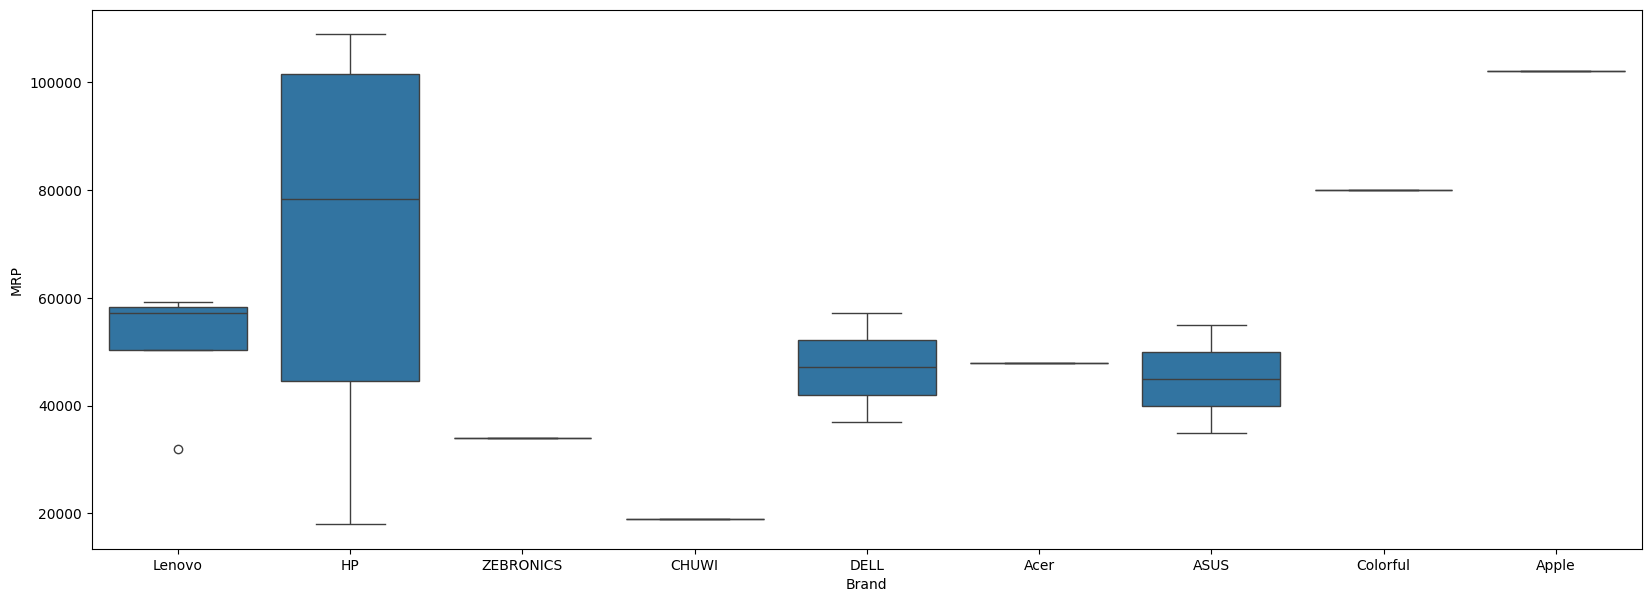

In [88]:
plt.figure(figsize=(20, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

In [89]:
#observation:


C:\Users\DELL\AppData\Local\Temp\ipykernel_24008\1617200632.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MRP)


<Axes: xlabel='MRP', ylabel='Density'>

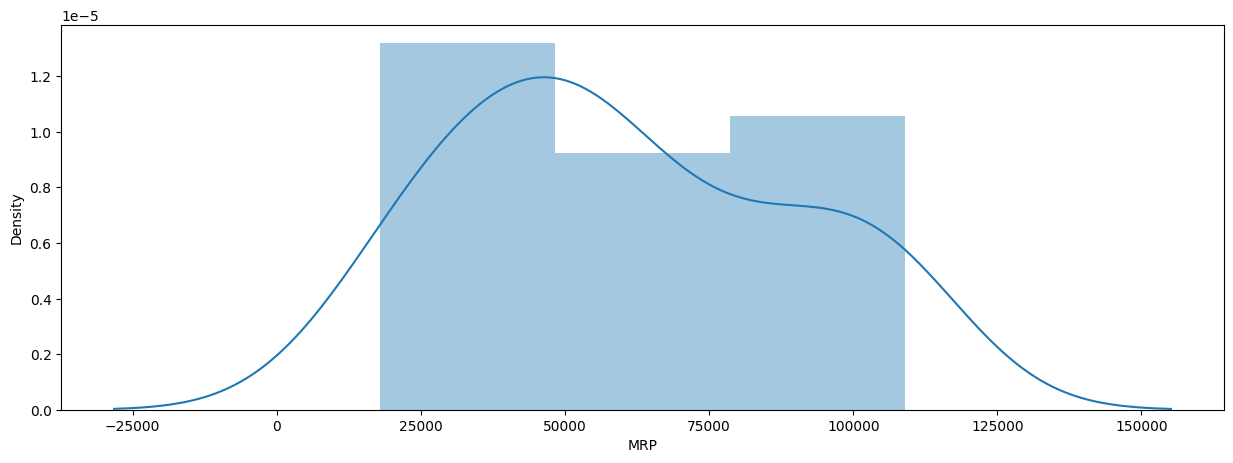

In [90]:
plt.figure(figsize=(15, 5))
sns.distplot(df.MRP)

<Axes: xlabel='count', ylabel='Brand'>

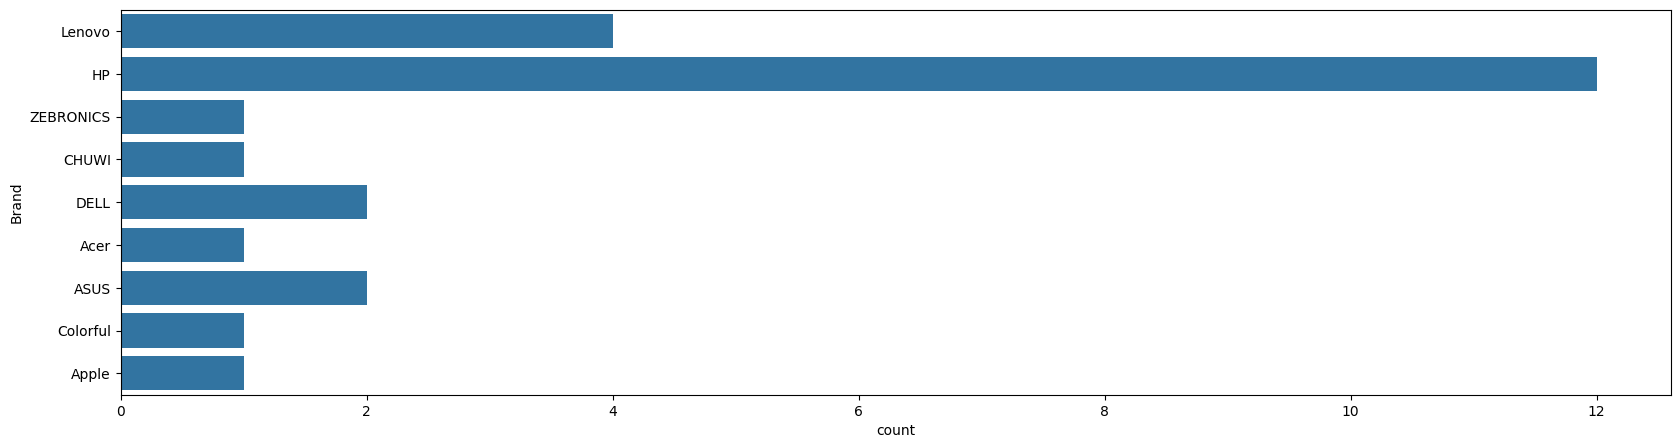

In [91]:
plt.figure(figsize=(20, 5))
sns.countplot(df.Brand)

In [92]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ASUS        34990.0   54990.0   44990.000000
Acer        47990.0   47990.0   47990.000000
Apple      101990.0  101990.0  101990.000000
CHUWI       18990.0   18990.0   18990.000000
Colorful    79990.0   79990.0   79990.000000
DELL        36990.0   57250.0   47120.000000
HP          17990.0  108900.0   69399.166667
Lenovo      31990.0   59190.0   51415.000000
ZEBRONICS   33990.0   33990.0   33990.000000

<Axes: xlabel='Brand'>

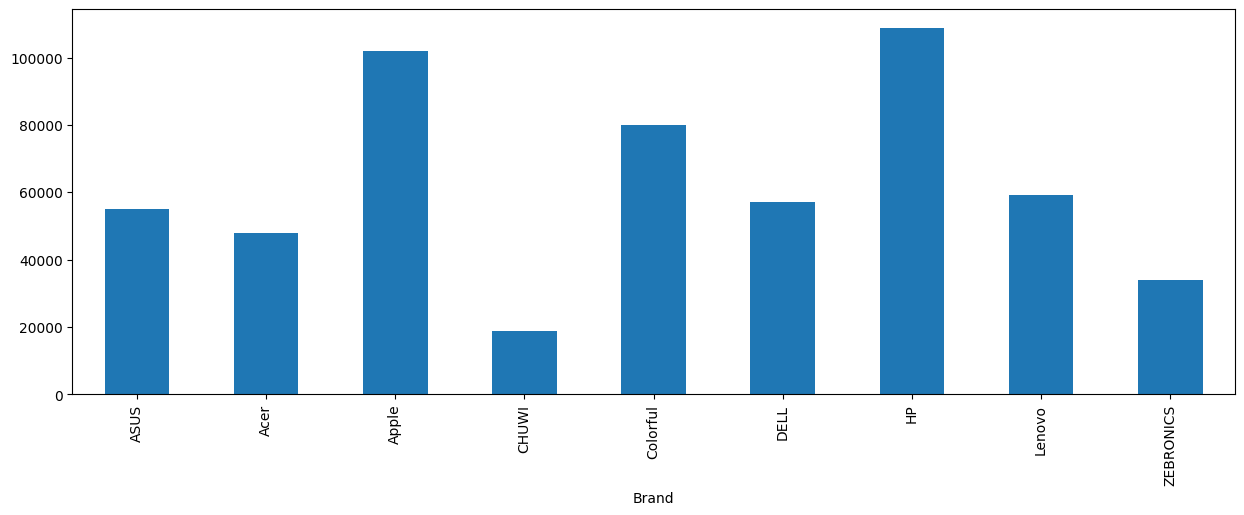

In [93]:
plt.figure(figsize=(15, 5))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

<Axes: xlabel='Brand'>

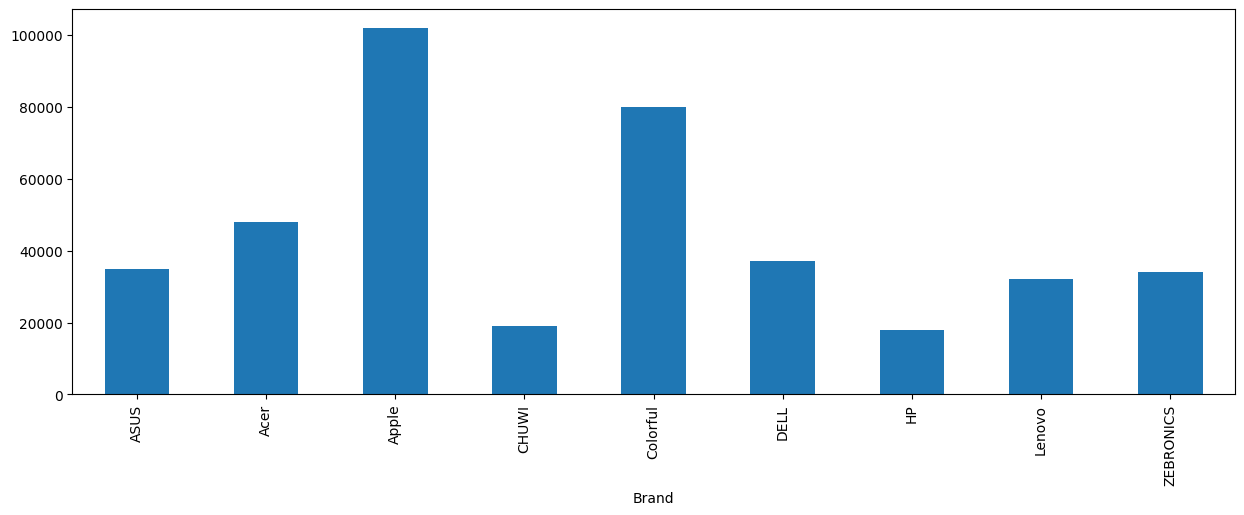

In [94]:
plt.figure(figsize=(15, 5))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')